In [3]:
# Importing necessary libraries
import pandas as pd
import tweepy
import re

In [4]:
# Using the consumer keys and access key to extract the tweets from twitter
consumer_key = "Idi8AXgk1YVbd8KwaOjEL3IXO"
consumer_secret = "WdQkKrqJZbfGctHpxsPy16e6ZKXzQIU1oJQrT549382t9noFp2"
access_key = "1374348926497615874-8y2iKFNcsk25Ba4e2CjXYUMUIRdSyA"
access_secret = "Yw3XPMzp9pUgsHoJvMEFK266iHvyWFue4G65BotJxbAts"


In [5]:
#Tweet extraction
alltweets = []


In [6]:
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [9]:
# Extracting tweets of "Bill Gates"
bill_tweets = get_all_tweets("BillGates")


...3607 tweets downloaded so far
...3807 tweets downloaded so far
...4007 tweets downloaded so far
...4207 tweets downloaded so far
...4407 tweets downloaded so far
...4607 tweets downloaded so far
...4807 tweets downloaded so far
...5007 tweets downloaded so far
...5207 tweets downloaded so far
...5407 tweets downloaded so far
...5607 tweets downloaded so far
...5807 tweets downloaded so far
...6007 tweets downloaded so far
...6207 tweets downloaded so far
...6407 tweets downloaded so far
...6414 tweets downloaded so far
...6414 tweets downloaded so far


In [10]:
# Checking the extracted tweets
bill_tweets


,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2021-06-04 17:41:13,[],"[{'screen_name': 'TerraPower', 'name': 'TerraP...",3140,None,1400870268814258177,en,None,394,False,Twitter Web App,This is an important step in the U.S. clean en...,"Seattle, WA",Bill Gates,None,None
1,2021-06-03 15:43:31,[],[],2809,None,1400478260966744067,en,None,290,False,Twitter Web App,Heroes like Dr. Mohamed Barrie are the reason ...,"Seattle, WA",Bill Gates,None,None
2,2021-06-02 20:04:35,"[{'text': 'COVAX', 'indices': [43, 49]}]","[{'screen_name': 'MSuzman', 'name': 'Mark Suzm...",0,None,1400181572796514306,en,None,129,False,Twitter Web App,RT @MSuzman: Promising news from the @Gavi #CO...,"Seattle, WA",Bill Gates,None,None
3,2021-06-02 16:26:18,[],"[{'screen_name': 'Breakthrough', 'name': 'Brea...",2141,None,1400126638067576833,en,None,329,False,Twitter Web App,This partnership between @Breakthrough Energy ...,"Seattle, WA",Bill Gates,None,None
4,2021-06-01 23:00:08,[],[],2002,None,1399863361383276545,en,None,263,False,Twitter Web App,The pandemic has exacerbated existing racial h...,"Seattle, WA",Bill Gates,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6409,2011-11-04 17:56:07,"[{'text': 'G20', 'indices': [34, 38]}, {'text'...",[],61,None,132516488505602048,en,None,197,False,Twitter Web Client,Gratifying to hear in person & in #G20 communi...,"Seattle, WA",Bill Gates,None,None
6410,2011-11-03 23:04:41,"[{'text': 'G20', 'indices': [87, 91]}, {'text'...",[],161,None,132231748900749312,en,None,340,False,Twitter Web Client,"Important forum, critical issue. Honored to ha...","Seattle, WA",Bill Gates,None,None
6411,2011-11-03 16:09:16,"[{'text': 'G20', 'indices': [104, 108]}, {'tex...","[{'screen_name': 'FranceG20', 'name': 'France ...",109,None,132127212571869185,en,None,470,False,Twitter Web Client,.@FranceG20 We cannot let the current economic...,"Seattle, WA",Bill Gates,None,None
6412,2011-11-03 00:51:36,"[{'text': 'foreignaid', 'indices': [112, 123]}...","[{'screen_name': 'Ed_Miliband', 'name': 'Ed Mi...",15,None,131896270360018946,en,None,50,False,Twitter Web Client,.@Ed_Miliband: enjoyed our talk. Thank you for...,"Seattle, WA",Bill Gates,None,None


In [11]:
# Extracting only the 'text' section of the tweet
bill_tweets["text"]


0       This is an important step in the U.S. clean en...
1       Heroes like Dr. Mohamed Barrie are the reason ...
2       RT @MSuzman: Promising news from the @Gavi #CO...
3       This partnership between @Breakthrough Energy ...
4       The pandemic has exacerbated existing racial h...
                              ...                        
6409    Gratifying to hear in person & in #G20 communi...
6410    Important forum, critical issue. Honored to ha...
6411    .@FranceG20 We cannot let the current economic...
6412    .@Ed_Miliband: enjoyed our talk. Thank you for...
6413    New video from @HansRosling may surprise: Data...
Name: text, Length: 6414, dtype: object

In [12]:
# Combining all the tweets into a single paragraph
tweet_df = " ".join(bill_tweets["text"])
tweet_df


'This is an important step in the U.S. clean energy transition. I’m excited to see @TerraPower working with… https://t.co/XxmheB64vm Heroes like Dr. Mohamed Barrie are the reason we started our foundation more than 20 years ago and why Melinda and… https://t.co/q9j7vzOd76 RT @MSuzman: Promising news from the @Gavi #COVAX AMC Summit as they have exceeded today’s fundraising target. This means more people in lo… This partnership between @Breakthrough Energy and the @EU_Commission will create jobs around the world, build susta… https://t.co/lwHqGSgghC The pandemic has exacerbated existing racial health inequities in the United States. The Health Equity Tracker is a… https://t.co/KIUqZ1siL9 Avoiding a climate disaster is possible if governments act today. @IEA’s Net Zero by 2050 report provides a roadmap… https://t.co/sghpGohQtZ RT @GlobalFund: Stronger collaboration can help countries recover from the impact of #COVID19 and progress towards health-related @GlobalGo… RT @gatesfoundation: A

In [13]:
#Text processing
# Removing all the http links from the tweets
tweet_df = re.sub(r"http\S+", "", tweet_df)
tweet_df


'This is an important step in the U.S. clean energy transition. I’m excited to see @TerraPower working with…  Heroes like Dr. Mohamed Barrie are the reason we started our foundation more than 20 years ago and why Melinda and…  RT @MSuzman: Promising news from the @Gavi #COVAX AMC Summit as they have exceeded today’s fundraising target. This means more people in lo… This partnership between @Breakthrough Energy and the @EU_Commission will create jobs around the world, build susta…  The pandemic has exacerbated existing racial health inequities in the United States. The Health Equity Tracker is a…  Avoiding a climate disaster is possible if governments act today. @IEA’s Net Zero by 2050 report provides a roadmap…  RT @GlobalFund: Stronger collaboration can help countries recover from the impact of #COVID19 and progress towards health-related @GlobalGo… RT @gatesfoundation: As our CEO @MSuzman says, no barriers should stand in the way of equitable access to vaccines. We are supportive of 

In [14]:
# Removing all the puntuations, numbers and lowering the case of  letters
tweets = re.sub("[^A-Za-z" "]+"," ",tweet_df).lower()
tweets = re.sub("[0-9" "]+"," ",tweets)
tweets

'this is an important step in the u s clean energy transition i m excited to see terrapower working with heroes like dr mohamed barrie are the reason we started our foundation more than years ago and why melinda and rt msuzman promising news from the gavi covax amc summit as they have exceeded today s fundraising target this means more people in lo this partnership between breakthrough energy and the eu commission will create jobs around the world build susta the pandemic has exacerbated existing racial health inequities in the united states the health equity tracker is a avoiding a climate disaster is possible if governments act today iea s net zero by report provides a roadmap rt globalfund stronger collaboration can help countries recover from the impact of covid and progress towards health related globalgo rt gatesfoundation as our ceo msuzman says no barriers should stand in the way of equitable access to vaccines we are supportive of a rt who the actaccelerator an unprecedented g

In [15]:
# Splitting the paragraph into words
tweet_words = tweets.split(" ")
tweet_words
len(tweet_words)


111621

In [17]:
# Importing the stop words
with open(r"sw.txt","r") as sw:
    stop = sw.read()
stop


"a\nabout\nabove\nafter\nagain\nagainst\nall\nalso\nam\nan\nand\nany\nare\naren't\nas\nat\nbe\nbecause\nbeen\nbefore\nbeing\nbelow\nbetween\nboth\nbut\nby\ncan\ncan't\ncannot\ncom\ncould\ncouldn't\ndid\ndidn't\ndo\ndoes\ndoesn't\ndoing\ndon't\ndown\nduring\neach\nelse\never\nfew\nfor\nfrom\nfurther\nget\nhad\nhadn't\nhas\nhasn't\nhave\nhaven't\nhaving\nhe\nhe'd\nhe'll\nhe's\nhence\nher\nhere\nhere's\nhers\nherself\nhim\nhimself\nhis\nhow\nhow's\nhowever\nhttp\ni\ni'd\ni'll\ni'm\ni've\nif\nin\ninto\nis\nisn't\nit\nit's\nits\nitself\njust\nk\nlet's\nlike\nme\nmore\nmost\nmustn't\nmy\nmyself\nno\nnor\nnot\nof\noff\non\nonce\nonly\nor\nother\notherwise\nought\nour\nours\nourselves\nout\nover\nown\nr\nsame\nshall\nshan't\nshe\nshe'd\nshe'll\nshe's\nshould\nshouldn't\nsince\nso\nsome\nsuch\nthan\nthat\nthat's\nthe\ntheir\ntheirs\nthem\nthemselves\nthen\nthere\nthere's\ntherefore\nthese\nthey\nthey'd\nthey'll\nthey're\nthey've\nthis\nthose\nthrough\nto\ntoo\nunder\nuntil\nup\nvery\nwas\nwasn'

In [18]:
# Removing all the stop words from the tweets
tweets_final = [w for w in tweet_words if not w in stop]
tweets_final
len(tweets_final)


59544

In [19]:
# Joining all the tweet words into one paragraph
tweets_final_string = " ".join(tweets_final)
tweets_final_string


'important step clean energy transition excited see terrapower working heroes dr mohamed barrie reason started foundation years ago melinda msuzman promising news gavi covax amc summit exceeded today fundraising target means people partnership breakthrough energy eu commission will create jobs around world build susta pandemic exacerbated existing racial health inequities united states health equity tracker avoiding climate disaster possible governments act today iea net zero report provides roadmap globalfund stronger collaboration help countries recover impact covid progress towards health related globalgo gatesfoundation ceo msuzman says barriers stand way equitable access vaccines supportive actaccelerator unprecedented global alliance develop amp deliver tests treatments amp vaccines needs fight honored speak today leadersclimatesummit three things need avoid climate dis ambitious short term goals critical moving closer net zero future rapidly scale encouraging see potus biden cli

In [20]:
#Sentimental analysis
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud


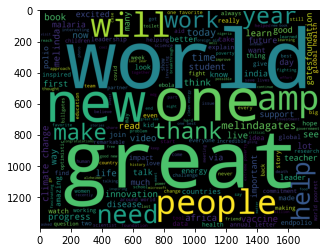

In [21]:
# Plotting a wordcloud with all the unique words in the tweets
wordcloud_tweet = WordCloud(
                    background_color="black",
                    width=1800,
                    height=1400,
                    ).generate(tweets_final_string)
plt.imshow(wordcloud_tweet)


In [22]:
# List of all the unique words in the reviews
tweet_unique = list(set("".join(tweets_final_string).split(" ")))
tweet_unique
len(tweet_unique)


5815

In [23]:
# Importing the positive words
with open(r"positive-words.txt","r") as pos:
    poswords= pos.read().split("\n")
poswords = poswords[36:]

# Importing the negative words
with open(r"negative-words.txt","r") as neg:
    negwords = neg.read().split("\n")

negwords = negwords[37:]


In [25]:
# Joining all the negative words into a paragraph
tweet_neg = " ".join([w for w in tweets_final if w in negwords])
tweet_neg



'inequities disaster critical difficult hard fail virus suffer worst disaster disaster disaster stark disaster urgent risks hard hard disaster problem wrong impossible wrong hard issue disaster disaster disaster devastating recession vice emergency nothing racism disaster misconceptions conspiracy disaster urgent inequality inevitable slow issues limited vice disaster critical poverty wild crisis crisis critical threat poor poorest struck poverty worst miss critical problem problem infection killer devastating worse critical mistake worrying challenging lose hard overstate critical loss lack critical lose anti racist nonexistent fail injustice injustice issue racism criminal horrifying brutal death broke protests distraction poverty outbreak outbreak virus urgent crisis dangerous missed slow stunted stunted heartbreaking utterly symptoms risks slow outbreak vulnerable sue neglected emergency worst deadly worst sue epidemic issue wild wild paralyzed poorest problems inequality poverty a

In [26]:
len(tweet_neg)

15461

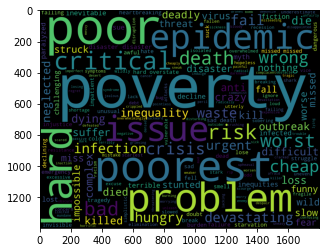

In [27]:
# Builiding wordcloud of negative words
wordcloud_neg = WordCloud(
                    background_color="black",
                    width=1800,
                    height=1400,
                    ).generate(tweet_neg)
plt.imshow(wordcloud_neg)


In [28]:
# Joining all the positive words into a paragraph
tweet_pos= " ".join([w for w in tweets_final if w in poswords])
tweet_pos



'important clean excited promising exceeded breakthrough stronger recover progress equitable supportive honored ambitious encouraging leading right poetic love support wins fail work encouraging helping work best encouraging innovation clean good safe great ease good important congratulations important excited thank great thanks led led inspiring thank kind helped breakthrough thank optimistic courageous work breakthrough innovation fortunate high clean thanks great work encouraging thanks fun thanks grateful safe effective inspired work thanks thanks meaningful courage thanks great important thanks great thoughtful thanks thank work breakthrough breakthrough great thank thanks great easy super thanks great available hopeful breakthrough supports enjoyed optimistic thrilled high inspire honored enough better benefits great elevate congratulations rightfully dominate commitment recovery toughest celebrate great innovation capability best strong better important congratulations glad prom

In [29]:
len(tweet_pos)

55277

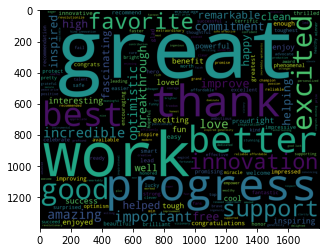

In [30]:
# Builiding wordcloud of positive words
wordcloud_pos = WordCloud(
                background_color="black",
                width=1800,
                height=1400,
                ).generate(tweet_pos)
plt.imshow(wordcloud_pos)


In [31]:
#Most frequent positive words are "Love", "Happy", "beautiful","good","work","fun"
#Most frequent negative words are "miss","damn","bad","missed"
#and no of positive words are higher(15332) than neg words(2588)